# Instruções da prova

- O único material que poderá ser consultado é este notebook, consultas à outros materiais ou à internet será considerado cola
- Renomear o notebook para C209-PV1.1-NOME_SOBRENOME_MATRICULA
- Enviar no teams a pasta com todas as mídias zipada com o nome "NOME_SOBRENOME_MATRICULA.zip"

# Parte Teórica

Classifique as afirmações em Verdadeiro ou Falso, justifique as afirmativas falsas, escreva suas respostas nos campos disponíveis com um '#" na frente de seu texto

1 - Imagens negativas são resultantes da operação "OU" entre duas imagens

In [1]:
Falso, a operação "NOT" gera a imagem negativa

SyntaxError: invalid syntax (2914611155.py, line 1)

2 - A conversão entre RGB e CMY é simples pois tratam-se de espaços de cores complementares

In [ ]:
Verdadeiro

3 - Imagens vetoriais apresentam serrilhamento quando são ampliadas

In [ ]:
Falso, elas não perdem a qualidade

4 - Imagens em grayscale possuem 3 páginas de cor porém todas estão em escala de cinza

In [ ]:
Falso, apenas uma

5 - Operações lógicas são aquelas que consistem na mudança espacial de pixels

In [ ]:
Falso, é uma operação bit a bit e não do espaço

# Parte Prática

### Material de apoio

### Importações

```
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
```

### Manipulação de imagens

```
img = Image.open('nome.extensão')
img = np.array(Image.open('nome.extensão'))
img = img[:, :, :3]
img_pil = Image.fromarray(img_np)
img.save('nome.png')
Image.fromarray(img).save('nome_arquivo.extensao')
(l,c,p) = img.shape
```

### Exibição de imagens

```
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(img1)
plt.subplot(2, 2, 2)
plt.imshow(img2)
```

### Reflexão 


#### Alt1
```
mario_refl = np.zeros(shape=mario.shape, dtype=np.uint8)
for i in range(l):
    for j in range(c):
        new_x = -j
        new_y = i
        mario_refl[new_y, new_x] = mario[i, j]
```

#### Alt2
```
mario_refl = np.zeros(shape=mario.shape, dtype=np.uint8)
mario_refl[::1, ::-1] = mario
```

### Greyscale

#### Algoritmo genérico, substituir o método escolhido
```
img_avg = np.zeros(shape=(l, c), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        r = float(img_np[i, j, 0])
        g = float(img_np[i, j, 1])
        b = float(img_np[i, j, 2])
        
        img_avg[i, j] = (aplicar método)
```

#### Métodos: 

Lightness: $\frac{max(R,G,B)+min(R,G,B)}{2}$

Average: $\frac{R+G+B}{3}$

Luminosity: $0.2126 \cdot R + 0.7152 \cdot G + 0.0722 \cdot B$

### Escalonamento com nearest neighbor

```
ls, cs = l * sy, c * sx
mario_nn = np.zeros(shape=(ls, cs, p), dtype=np.uint8)

for i in range(ls):
    for j in range(cs):
        new_y = int(np.floor(i * (l / ls)))
        new_x = int(np.floor(j * (c / cs)))
        
        mario_nn[i, j] = mario[new_y, new_x]
```

### Rotação com interpolação

```
alpha = np.pi / 6 # 30°

ls, cs = int(l * np.sqrt(2)), int(c * np.sqrt(2))
mario_rot = np.zeros((ls, cs, p), dtype=np.uint8)
for i in range(ls):
    for j in range(cs):
        cx = j - (ls / 2)
        cy = i - (cs / 2)
        
        new_x = int( cx * np.cos(alpha) + cy * np.sin(alpha) + l / 2)
        new_y = int(-cx * np.sin(alpha) + cy * np.cos(alpha) + c / 2)
        
        if 0 <= new_x < c and 0 <= new_y < l:
            mario_rot[i, j] = mario[new_y, new_x]
```

**1 -** Importe as bibliotecas que serão usadas

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

**2 -** Abra as imagens mustache.jpg e shrek.png, retire o canal alpha (se necessário), exiba essas imagens e mostre o formato de cada uma

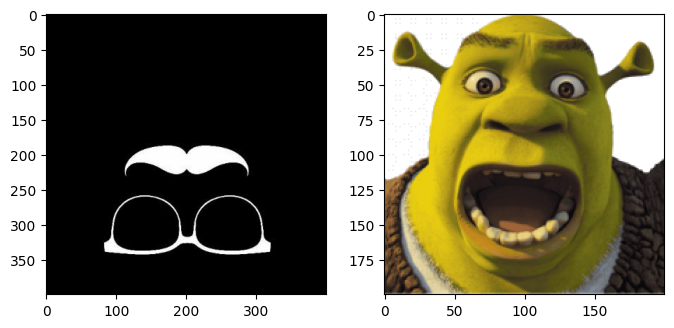

In [4]:
img1 = Image.open('mustache.jpg')
img1 = np.array(Image.open('mustache.jpg'))
img1 = img1[:, :, :3]
img2 = Image.open('mustache.jpg')
img2 = np.array(Image.open('shrek.png'))
img2 = img2[:, :, :3]

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(img1)
plt.subplot(2, 2, 2)
plt.imshow(img2)

**3 -** Crie uma função que realize a reflexão no eixo x. Essa função deve receber uma **imagem como parâmetro** e **retornar uma imagem refletida no eixo x**. Aplique essa função na imagem "mustache" aberta na questão anterior e mostre o resultado.

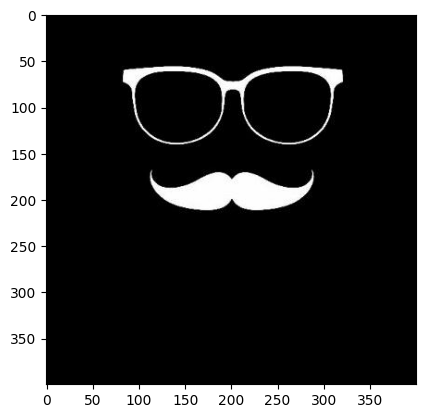

In [13]:
mustache_refl = np.zeros(shape=img1.shape, dtype=np.uint8)
mustache_refl[::-1, ::1] = img1
plt.imshow(mustache_refl)

**4 -** Realize a operação lógica NOT com a imagem da questão anterior e mostre o resultado

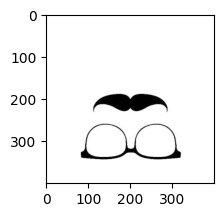

In [20]:
img1_not = np.invert(img1)

plt.subplot(2, 2, 1)
plt.imshow(img1_not, cmap='gray')

**5 -** Crie uma função que realize o escalonamento de uma imagem que receba como parâmetro uma **imagem, sx e sy**, sendo sx e sy os fatores de escalonamento e **retorne a imagem escalonada**, em seguida aplique o escalonamento na imagem "shrek" para que fique do mesmo tamanho da imagem da questão anterior. Exiba o resultado.

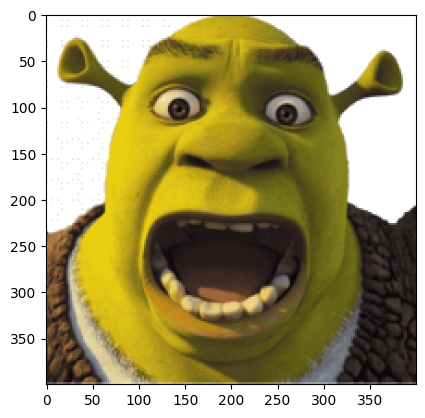

In [26]:
(l, c, p) = img2.shape
ls, cs = l * 2, c * 2
img2_nn = np.zeros(shape=(ls, cs, p), dtype=np.uint8)

for i in range(ls):
    for j in range(cs):
        new_y = int(np.floor(i * (l / ls)))
        new_x = int(np.floor(j * (c / cs)))
        
        img2_nn[i, j] = img2[new_y, new_x]

plt.imshow(img2_nn)

**6 -** Realize o mascaramento (lógica E) entre as imagens das questões 4 e 5, exiba o resultado. 

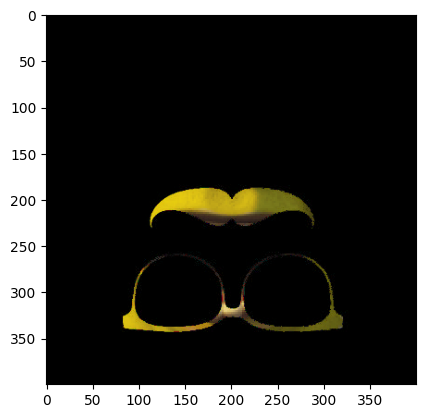

In [28]:
bin_and = img1 & img2_nn

plt.imshow(bin_and)

**7 -** Crie uma função para aplicar um método grayscale de sua escolha, que receba como parâmetro uma imagem e retorne uma imagem em greyscale. Aplique essa função na imagem resultante da questão anterior e mostre o resultado.

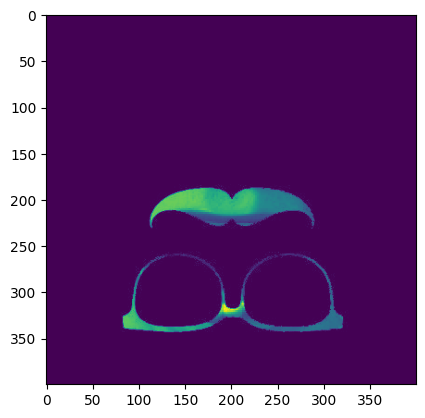

In [30]:
img_np = np.array(bin_and)
(l, c, p) = bin_and.shape

img_avg = np.zeros(shape=(l, c), dtype=np.uint8)
for i in range(l):
    for j in range(c):
        r = float(img_np[i, j, 0])
        g = float(img_np[i, j, 1])
        b = float(img_np[i, j, 2])
        
        img_avg[i, j] = (r + g + b) / 3

plt.imshow(img_avg)

**8 -** Crie uma função que realize uma rotação com interpolação, a função deve receber como parâmetro **uma imagem e o ângulo alpha com que deve ser rotacionada** e **retornar uma imagem rotacionada com o angulo alpha**. Modifique o algoritmo de rotação para que funcione se necessário. Aplique a função na imagem resultante da questão anterior **com ângulo de 60°** e mostre o resultado.

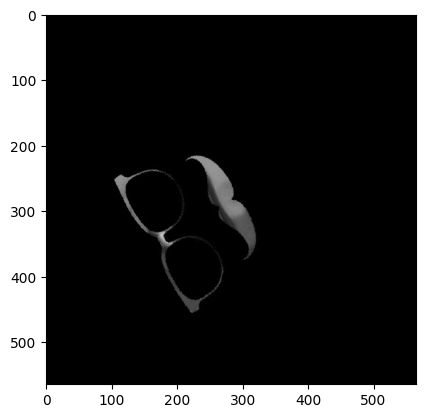

In [49]:
alpha = np.pi / 3 # 60°

ls, cs = int(l * np.sqrt(2)), int(c * np.sqrt(2))
resulta_rot = np.zeros((ls, cs, p), dtype=np.uint8)
for i in range(ls):
    for j in range(cs):
        cx = j - (ls / 2)
        cy = i - (cs / 2)
        
        new_x = int( cx * np.cos(alpha) + cy * np.sin(alpha) + l / 2)
        new_y = int(-cx * np.sin(alpha) + cy * np.cos(alpha) + c / 2)
        
        if 0 <= new_x < c and 0 <= new_y < l:
            resulta_rot[i, j] = img_avg[new_y, new_x]

plt.imshow(resulta_rot)

**9 -** Salve a imagem da questão anterior no disco com o nome "resultado.jpg"

In [51]:
Image.fromarray(resulta_rot).save('resultado.png')